In [1]:
import sys, os, re, jax, json
sys.path.append(os.path.abspath("./../../feedback-grape"))
sys.path.append(os.path.abspath("./../../"))
sys.path.append(os.path.abspath("./../"))

from matplotlib import pyplot as plt
import numpy as np

from plot_helpers import (
    open_from_dir,
    plot_runs,
    plot_runs_1D,
    plot_grid,
    grid_grouped_params,
    select_best_runs,
    extract_time_constants,
    sort_by,
    _labels_from_params,
    white_outline,
)

In [2]:
max_time = 200

fidelities_mat, params_grouped, params_each = open_from_dir("./eval")
fidelities_best_mat, params_grouped_best, params_each_best = select_best_runs(fidelities_mat, params_each)

#with open("./stabilizer code/lut_t=3_l=2_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloch.json", "r") as f:
#    fidelities_stab = np.array(json.load(f)["fidelity_each_timestep"])

#fidelities_base = np.load("./baseline/lut_t=3_l=2_w=111_Nqubits=3_Nmeas=2_gammap=0.0001_gammam=0.05336699231206307_rhot=bloch_rhoe=bloc.npz")["fidelities"]

fidelities_best_mat = fidelities_best_mat[:,:max_time+1]
fidelities_mat = fidelities_mat[:,:max_time+1]
#fidelities_base = fidelities_base[:max_time+1]
#fidelities_stab = fidelities_stab[:max_time+1]

Opening files...


100%|██████████| 6/6 [00:00<00:00, 845.40it/s]

Done.


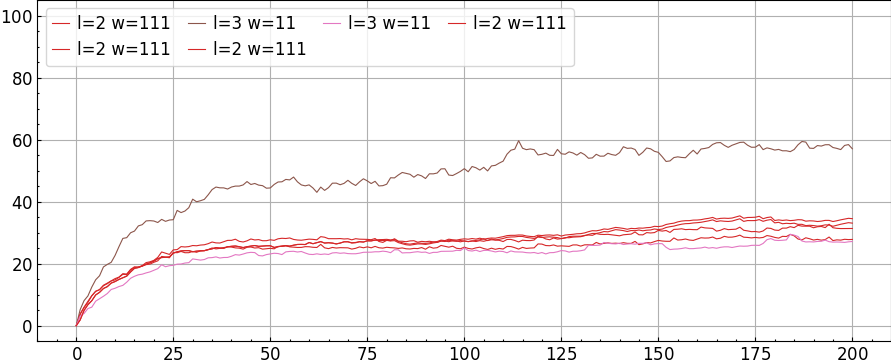

In [3]:
from os import path


fig, ax = plt.subplots(figsize=(6.1811*1.5,4))
j = 0
for i, (fidelities, p) in enumerate(zip(fidelities_mat, params_each)):
    if p['w'] == [1,1,1] and p['l'] == 2:
        ax.plot((1 - fidelities)*100, label=f"l={p["l"]} w=111", color = "C3")
    elif p['w'] == [1,1,1,1,1] and p['l'] == 6:
        ax.plot((1 - fidelities)*100, label=f"l={p["l"]} w=11111", color = "C4")
    else:
        ax.plot((1 - fidelities)*100, label=f"l={p["l"]} w={''.join([str(w) for w in p['w']])}", color = f"C{j+5}")
        j += 1

#ax.plot((1-fidelities_stab)*100, label="Stabilizer code", color="C1", path_effects=white_outline)
#ax.plot((1-fidelities_base)*100, label="No error correction", color="C2", path_effects=white_outline)
#ax.set_xlabel("$\\textrm{evaluation timestep }t\\textrm{ (arb.)}$")
#ax.set_ylabel("$\\textrm{Infidelity (\\%)}$")
ax.set_ylim(-5, 105)
#ax.set_xlim(0,200)
ax.legend(loc="upper left", ncol=4)
ax.grid()
plt.tight_layout()
plt.show()

fig.savefig("./eval_plot.svg")